## **“Are Colombia’s meteorological stations well-placed to support its main crop-producing municipalities?”**


#### Importar librerías

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as cx
from pathlib import Path
import numpy as np
import fiona

## Task 1

### Lectura de archivos
Se define la ruta ruta principal en donde reposan los 3 archivos a trabajar:
* municipios_colombia.shp
* Evaluaciones_Agropecuarias_Municipales_EVA.csv
* Catalogo_Estaciones_IDEAM.csv

Para los archivos .csv se emplea **utf-8** como sistema para la lectura

In [5]:
root_folder = r"C:\Users\sanac\Documents\UN\Programacion_SIG\Archivos"
shp_path = root_folder+"/municipios_colombia.shp"
csv_path = root_folder+"/Evaluaciones_Agropecuarias_Municipales_EVA.csv"
stations_csv_path = root_folder+"/Catalogo_Estaciones_IDEAM.csv"
road_path = root_folder+"/CBasica.gdb"
muni = gpd.read_file(shp_path)
eva = pd.read_csv(csv_path, encoding ='utf-8')
estac = pd.read_csv(stations_csv_path, encoding ='utf-8')

In [6]:
print(fiona.listlayers(road_path))

['Via', 'Puente_L', 'Puente_P', 'Tunel', 'VFerre', 'LVia', 'SVial', 'T_1_DirtyAreas', 'T_1_PointErrors', 'T_1_LineErrors', 'T_1_PolyErrors']


In [8]:
roads = gpd.read_file(road_path, layer="Via")

### Reconocimiento de datos
Se emplea `.info()` para conocer las columnas y el tipo de cada uno de los atributos que se encuentra en el gdf

Se emplea `.head()` para desplegar los 5 primeros registros en el gdf

In [5]:
muni.info()
muni.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  1122 non-null   object  
 1   MPIO_CCDGO  1122 non-null   object  
 2   MPIO_CNMBR  1122 non-null   object  
 3   MPIO_CDPMP  1122 non-null   object  
 4   VERSION     1122 non-null   int64   
 5   AREA        1122 non-null   float64 
 6   LATITUD     1122 non-null   float64 
 7   LONGITUD    1122 non-null   float64 
 8   STCTNENCUE  1122 non-null   float64 
 9   STP3_1_SI   1122 non-null   float64 
 10  STP3_2_NO   1122 non-null   float64 
 11  STP3A_RI    1122 non-null   float64 
 12  STP3B_TCN   1122 non-null   float64 
 13  STP4_1_SI   1122 non-null   float64 
 14  STP4_2_NO   1122 non-null   float64 
 15  STP9_1_USO  1122 non-null   float64 
 16  STP9_2_USO  1122 non-null   float64 
 17  STP9_3_USO  1122 non-null   float64 
 18  STP9_4_USO  1122 non-null   float64 
 19

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CDPMP,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,...,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,Codigo_Mun,geometry
0,18,001,FLORENCIA,18001,2018,2.547638e+09,1.749139,-75.558239,71877.0,32.0,...,48848.0,59610.0,21898.0,4592.0,5892.0,3799.0,2.942508,0.206928,18001,"POLYGON ((850567.651 734450.429, 850602.776 73..."
1,18,029,ALBANIA,18029,2018,4.141221e+08,1.227865,-75.882327,2825.0,24.0,...,1940.0,1712.0,231.0,41.0,215.0,46.0,1.112829,0.033618,18029,"POLYGON ((797693.586 642855.101, 797693.823 64..."
2,18,094,BELÉN DE LOS ANDAQUÍES,18094,2018,1.191619e+09,1.500923,-75.875645,4243.0,54.0,...,3541.0,3340.0,490.0,119.0,720.0,123.0,2.234657,0.096745,18094,"POLYGON ((809754.098 685339.982, 809743.624 68..."
3,18,247,EL DONCELLO,18247,2018,1.106076e+09,1.791386,-75.193944,8809.0,0.0,...,7571.0,6287.0,1029.0,228.0,1095.0,171.0,3.154370,0.089867,18247,"POLYGON ((857152.436 748523.984, 857180.000 74..."
4,18,256,EL PAUJÍL,18256,2018,1.234734e+09,1.617746,-75.234043,5795.0,0.0,...,6072.0,4066.0,639.0,108.0,916.0,99.0,3.529316,0.100309,18256,"POLYGON ((856617.069 736147.468, 857365.135 73..."


En el archivo denominado **eva** se emplea `.columns` para conocer las columnas que integran el archivo

In [6]:
print(eva.columns)
eva.head()

Index(['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO',
       'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)',
       'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION',
       'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')


,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


Al igual que en **eva** y **muni**, se emplean `.columns` y `.head()` para realizar la revisión del contenido de **estac**

In [7]:
print(estac.columns)
estac.head()

Index(['Codigo', 'Nombre', 'Categoria', 'Estado', 'Departamento', 'Municipio',
       'Ubicación', 'Altitud', 'Fecha_instalacion', 'Fecha_suspension',
       'Corriente'],
      dtype='object')


,Codigo,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)",2582,2016-11-15,NaN,Guaitara
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)",2450,2005-12-10,NaN,Guaitara
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)",3120,2004-03-01,NaN,Guaitara
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Guaitara
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Amazonas


### Proyección muni y estac
Se emplea `.crs` aplicado a **muni** para conocer el sistema de proyección del .shp

In [8]:
print("CRS muni:", muni.crs)

CRS muni: EPSG:3116


Con respecto a **estac**, es necesario realizar la conversión a un GeoDataFrame por medio de `.GeoDataFram`, la cual se almacena en **estac_gpd**. Dentro de `.GeoDataFram` se define el sistema de coordenadas teniendo en cuenta las columnas de Longitud y Latitud que se encuentran dentro del documento

Se realiza la reproyección del archivo de 4326 a 3116 por medio de `.to_crs()`

In [9]:
estac[['Latitud', 'Longitud']] = estac['Ubicación'].apply(lambda x: pd.Series(eval(x)))
estac_gpd = gpd.GeoDataFrame(
    estac,
    geometry = gpd.points_from_xy(estac['Longitud'], estac['Latitud']),
    crs="EPSG:4326"
)
estac_gpd = estac_gpd.to_crs(epsg=3116)
print(estac_gpd.head())

     Codigo                          Nombre            Categoria  Estado  \
0  52057100      RUMICHACA - AUT [52057100]         Limnigráfica  Activa   
1  52055170    LA JOSEFINA - AUT [52055170]  Climática Principal  Activa   
2  52055220     EL PARAISO - AUT [52055220]  Climática Principal  Activa   
3  44015070      EL PEPINO - AUT [44015070]  Climática Principal  Activa   
4  48015040  PUERTO NARINO - AUT [48015040]  Climática Principal  Activa   

  Departamento      Municipio                    Ubicación  Altitud  \
0       Nariño        Ipiales   (0.81378611, -77.66197778)     2582   
1       Nariño      Contadero   (0.93030556, -77.49119444)     2450   
2       Nariño      Túquerres   (1.07061111, -77.63688889)     3120   
3     Putumayo          Mocoa   (1.08288889, -76.66711111)      760   
4     Amazonas  Puerto Nariño  (-3.78030556, -70.36263889)      158   

  Fecha_instalacion Fecha_suspension Corriente   Latitud   Longitud  \
0        2016-11-15              NaN  Guaitar

Sobre **eva** se realiza un renombramiento de la columna 'CÓD. MUN.' a 'MPIO' por facilidad en la escritura del código por medio de `.rename()`

Se evidencia que dentro de **eva** y **muni**, se encuentran las columnas de los códigos municipales, por tanto, a los dos archivos se les aplica `.astype(str).str.zfill(5)` con el fin de que el tipo de dato sea string con 5 caracteres debido a que esa es la cantidad del código de municipio

In [38]:
eva = eva.rename(columns={'CÓD. MUN.': 'MPIO'})
eva['MPIO'] = eva['MPIO'].astype(str).str.zfill(5)
muni['MPIO_CDPMP'] = muni['MPIO_CDPMP'].astype(str).str.zfill(5)

## Task 2

Se realiza un filtro sobre **eva** por medio de `.query()` en donde se define el cultivo y el año

* Cultivo = papa
* Año = 2017

In [11]:
papa = (
    eva.query('CULTIVO == "PAPA" and AÑO == 2017')
    .copy()
)

Teniendo en cuenta que el cálculo de rendimiento se realiza por la relación de la producción y el área sembrada, se realiza la realiza la operación tomando dichas variables y creando una nueva variable dentro de **papa** denominada Rendimiento (ton/ha)

In [12]:
papa['Rendimiento (ton/ha)'] = (papa['Producción\n(t)'] / papa['Área Sembrada\n(ha)'])

Una vez calculado el rendimiento, se realiza una agrupación por municipio por medio de `.groupby()` y a esta, se le agrega la producción, área sembrada y rendimiento por municipio por medio de `.agg()` 

In [13]:
papa_agrupado = papa.groupby(['MPIO','MUNICIPIO']).agg({
    'Producción\n(t)': 'sum',
    'Área Sembrada\n(ha)': 'sum',
    'Rendimiento (ton/ha)': 'sum'
}).reset_index()

papa_agrupado.head()

,MPIO,MUNICIPIO,Producción\n(t),Área Sembrada\n(ha),Rendimiento (ton/ha)
0,05001,MEDELLIN,1312,91,28.961240
1,05002,ABEJORRAL,1560,160,19.500000
2,05079,BARBOSA,432,60,14.400000
3,05086,BELMIRA,3660,210,35.000000
4,05088,BELLO,3783,295,25.629861


## Task 3

Para determinar el cuartil superior (Q3) se emplea `.quantile(0.75)` y se almacena en **papa_q3**

In [14]:
papa_q3 = papa_agrupado['Producción\n(t)'].quantile(0.75)
print(papa_q3)

12606.0


Para determinar los 20 mayores productores de papa en 2017, se ordena **papa_agrupado** en orden descendente por medio de `.sort_values()`, además, se agrega `.head(20)` para traer los primeros 20 registros

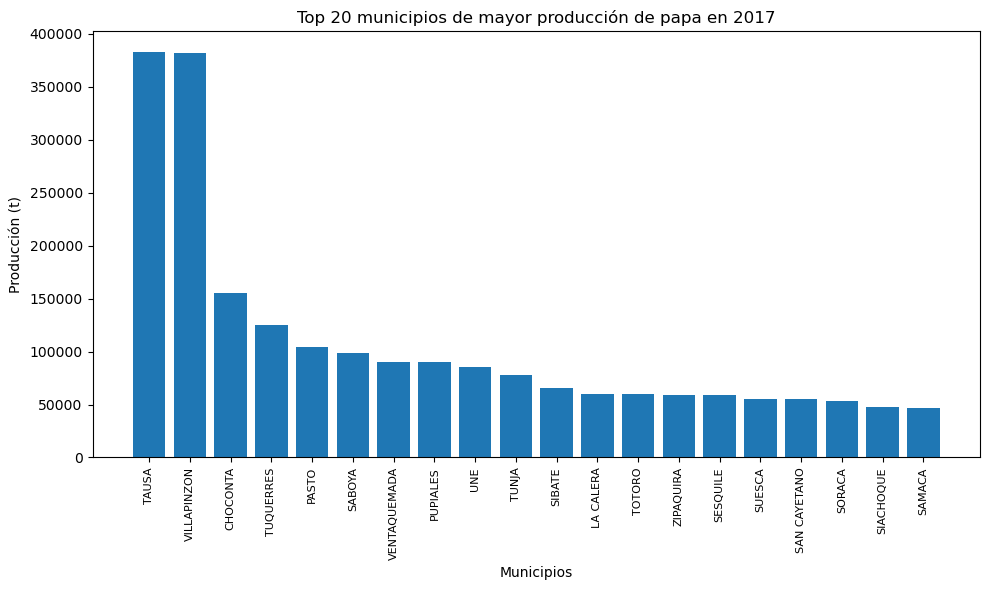

In [15]:
top_20 = papa_agrupado.sort_values(by='Producción\n(t)', ascending=False).head(20)
top_20.head(20)

output_folder = r"C:\Users\sanac\Documents\UN\Programacion_SIG\Archivos\figures"
output_path = os.path.join(output_folder, "top20_papa_2017.png")

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_20['MUNICIPIO'][::1], top_20['Producción\n(t)'][::1])
ax.set_ylabel('Producción (t)')
ax.set_xlabel('Municipios')
ax.set_title('Top 20 municipios de mayor producción de papa en 2017')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
fig.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

Para generar el mapa de los 20 municipios con mayor productividad de papa, es necesario generar un join entre **muni** y **top_20_map**. Lo anterior se realiza con `.merge()` en el que se define el df del cual se va a realizar el join (top_20). Así, como resultado, dentro del gdf se asocia la producción de los municipios

In [37]:
top_20_map = muni.merge(
    top_20,
    how = 'left',                
    left_on = 'MPIO_CDPMP',       
    right_on = 'MPIO',            
    indicator = True,             
    validate = 'one_to_one',      
    suffixes = ('', '_eva')       
)

La representación espacial de los 20 mayores productores de papa se realiza por medio de `.plot`

Se generan dos mapas. El primero actúa como mapa base, por lo que se toma el gdf **muni**

El mapa que contiene la información de producción se define en `column`

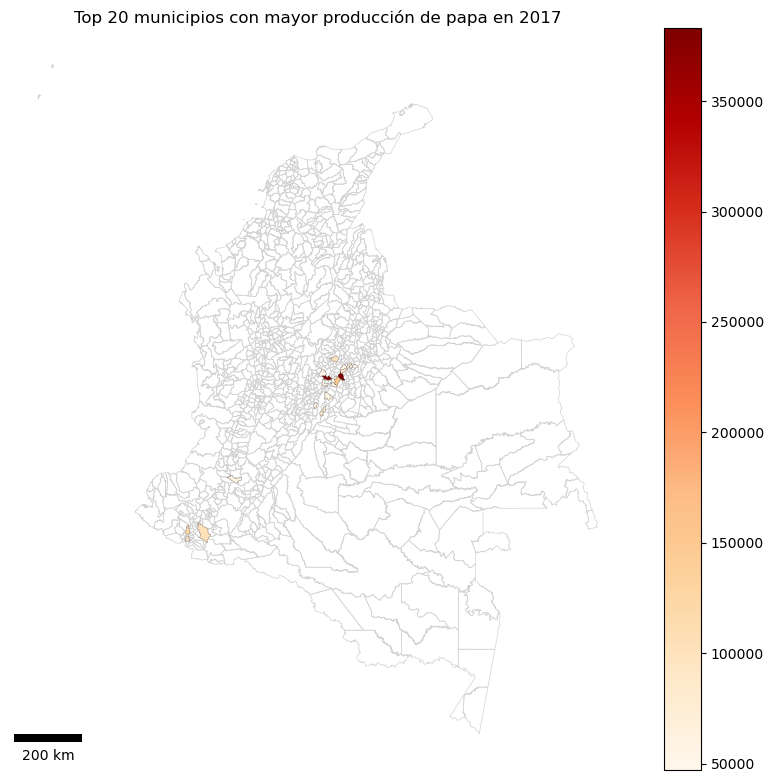

In [17]:
from matplotlib_scalebar.scalebar import ScaleBar

output_path = os.path.join(output_folder, "mapa_top20_papa_2017.png")

fig, ax = plt.subplots(figsize=(8, 8))


muni.plot(
    ax=ax,
    facecolor='none',
    edgecolor='lightgrey',
    linewidth=0.5
)


top_20_map.plot(
    ax=ax,
    column='Producción\n(t)',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.1
)


scalebar = ScaleBar(1, location='lower left', units='m', scale_loc='bottom')
ax.add_artist(scalebar)


ax.set_title('Top 20 municipios con mayor producción de papa en 2017')
ax.set_axis_off()
plt.tight_layout()

fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

## Task 4

Se realiza disolución sobre **muni** por departamento con `.dissolve()`. Se utiliza `.reset_index()` para mantener los índices iniciales del gdf

In [55]:
dptos = muni.dissolve(
    by ='DPTO_CCDGO').reset_index()

Se visualiza las columnas que se encuentran en **dptos**

In [56]:
dptos.columns.tolist()

['DPTO_CCDGO',
 'geometry',
 'MPIO_CCDGO',
 'MPIO_CNMBR',
 'MPIO_CDPMP',
 'VERSION',
 'AREA',
 'LATITUD',
 'LONGITUD',
 'STCTNENCUE',
 'STP3_1_SI',
 'STP3_2_NO',
 'STP3A_RI',
 'STP3B_TCN',
 'STP4_1_SI',
 'STP4_2_NO',
 'STP9_1_USO',
 'STP9_2_USO',
 'STP9_3_USO',
 'STP9_4_USO',
 'STP9_2_1_M',
 'STP9_2_2_M',
 'STP9_2_3_M',
 'STP9_2_4_M',
 'STP9_2_9_M',
 'STP9_3_1_N',
 'STP9_3_2_N',
 'STP9_3_3_N',
 'STP9_3_4_N',
 'STP9_3_5_N',
 'STP9_3_6_N',
 'STP9_3_7_N',
 'STP9_3_8_N',
 'STP9_3_9_N',
 'STP9_3_10',
 'STP9_3_99',
 'STVIVIENDA',
 'STP14_1_TI',
 'STP14_2_TI',
 'STP14_3_TI',
 'STP14_4_TI',
 'STP14_5_TI',
 'STP14_6_TI',
 'STP15_1_OC',
 'STP15_2_OC',
 'STP15_3_OC',
 'STP15_4_OC',
 'TSP16_HOG',
 'STP19_EC_1',
 'STP19_ES_2',
 'STP19_EE_1',
 'STP19_EE_2',
 'STP19_EE_3',
 'STP19_EE_4',
 'STP19_EE_5',
 'STP19_EE_6',
 'STP19_EE_9',
 'STP19_ACU1',
 'STP19_ACU2',
 'STP19_ALC1',
 'STP19_ALC2',
 'STP19_GAS1',
 'STP19_GAS2',
 'STP19_GAS9',
 'STP19_REC1',
 'STP19_REC2',
 'STP19_INT1',
 'STP19_INT2',
 'STP1

Se realiza la unión entre **estac_gpd** y **dptos** por medio de `gpd.sjoin()` manteniendo las filas de **estac_gpd**

Se realiza el conteo de las estaciones por departamento realizando una agrupación por **'DPTO_CCDGO'** y se agrega el conteo de cada objeto y el primer nombre del departamento que se asocia al objeto

In [79]:
stations_joined = gpd.sjoin(estac_gpd, dptos, how='left', predicate='within')
   
station_counts = stations_joined.groupby('DPTO_CCDGO').agg(
    Conteo = ('geometry', 'size'),        
    Departamento = ('Departamento', 'first') 
).reset_index()
    
print("Number of stations per department:")
print(station_counts)

Number of stations per department:
   DPTO_CCDGO  Conteo                                       Departamento
0          05    1215                                          Antioquia
1          08     110                                          Atlantico
2          11     327                                             Bogotá
3          13     311                                            Bolívar
4          15     515                                             Boyacá
5          17     393                                             Caldas
6          18      62                                            Caquetá
7          19     383                                              Cauca
8          20     269                                              Cesar
9          23     200                                            Córdoba
10         25    1058                                       Cundinamarca
11         27     125                                              Chocó
12         41   

Se realiza la unión de **dptos** con **station_counts** con el fin de asignar la cantidad de estaciones a cada departamento y poder visualizarlo en un mapa. La columna para realizar la comparación en ambos casos es **'DPTO_CCDGO'**

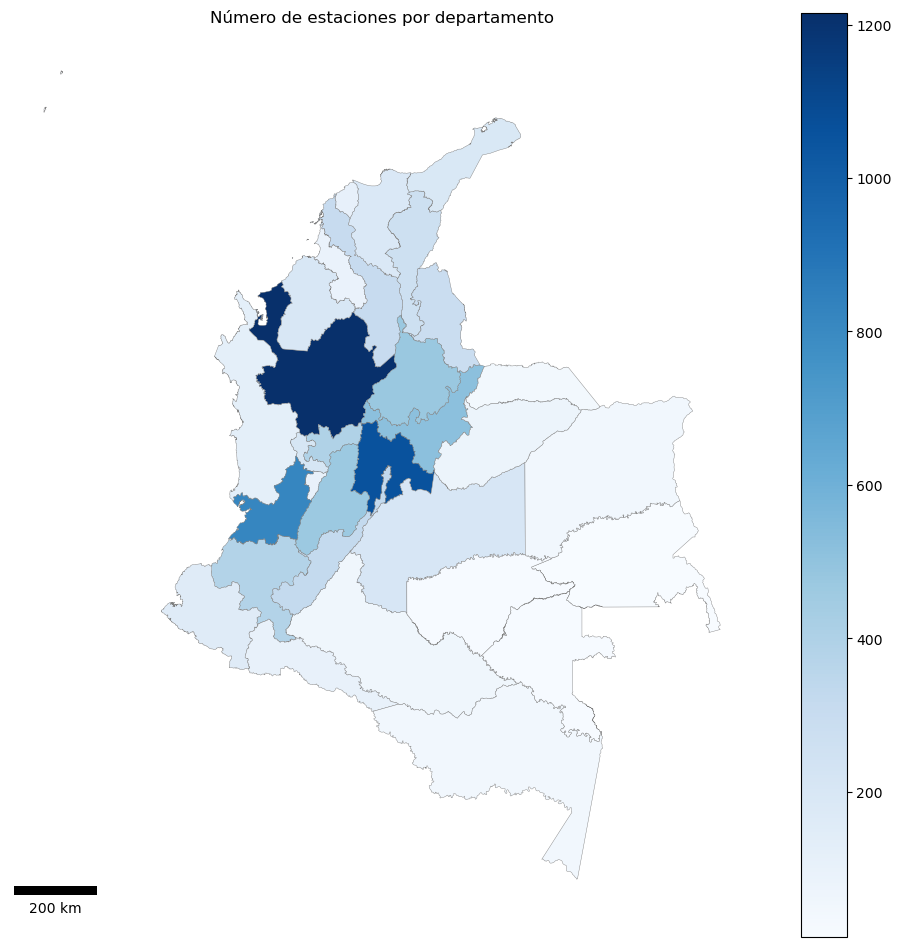

In [80]:
dpto_counts = dptos.merge(
    station_counts,
    how='left',              
    left_on='DPTO_CCDGO',      
    right_on='DPTO_CCDGO',          
    indicator=True,             
    validate='one_to_many',      
    suffixes=('', '_eva')       
)

output_path = os.path.join(output_folder, "mapa_estaciones_dpto.png")

fig, ax = plt.subplots(figsize=(12, 12))
dpto_counts.plot(
    column='Conteo',
    cmap='Blues',
    legend=True,
    edgecolor='grey',
    linewidth=0.3,
    ax=ax
)

scalebar = ScaleBar(1, location='lower left', units='m', scale_loc='bottom')
ax.add_artist(scalebar)

ax.set_title('Número de estaciones por departamento')
ax.set_axis_off()

fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

Se definen los primeros 20 departamentos con mayor número de estaciones por medio de `.sort_values().head(20)`, filtrando por **Conteo**

Se define la figura de un tamaño de 10*8, de manera horizontal con `ax.barh()`, donde por dentro se definen los estilos de visualización y los datos a mostrar, **Conteo** por departamento

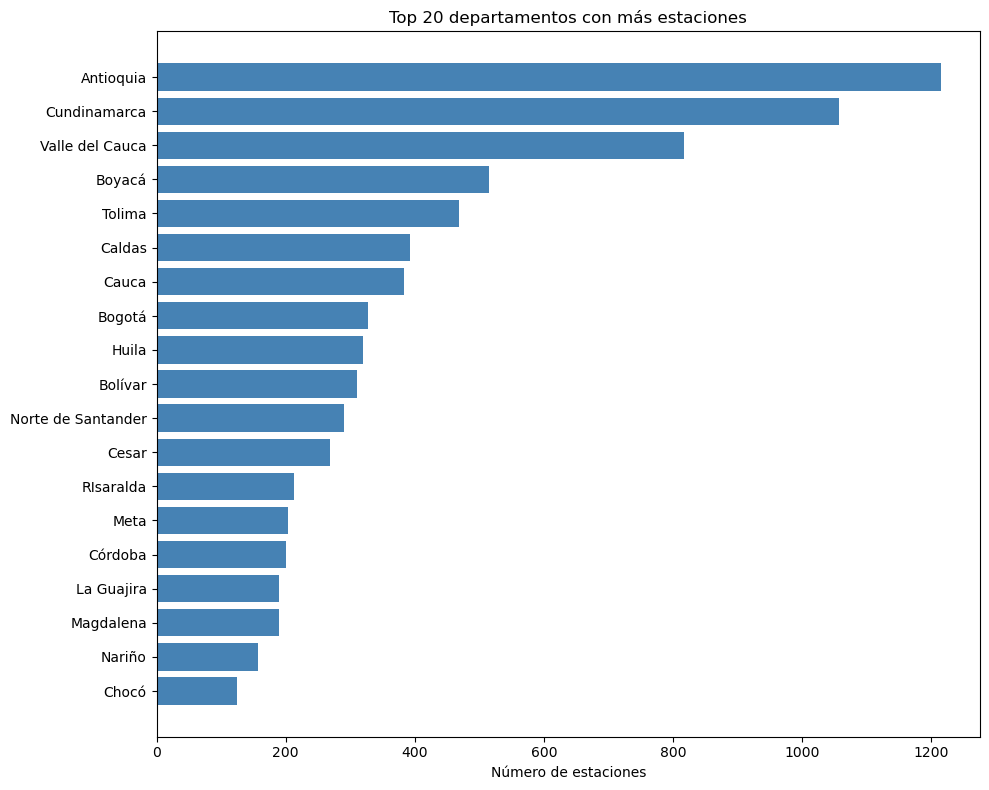

In [83]:
dpto_counts = dpto_counts.sort_values('Conteo', ascending=False).head(20)

output_path = os.path.join(output_folder, "estaciones_dpto.png")

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(
    dpto_counts['Departamento'],
    dpto_counts['Conteo'],
    color='steelblue'
)
ax.invert_yaxis()
ax.set_xlabel('Número de estaciones')
ax.set_title('Top 20 departamentos con más estaciones')
plt.tight_layout()

fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

## Task 5

Se realiza la unión entre **muni** y **eva** con el fin de determinar la producción por todos los cultivos en cada departamento

In [87]:
muni_eva = muni.merge(
    eva,
    how='left',                 
    left_on='MPIO_CDPMP',       
    right_on='MPIO',            
    indicator=True,             
    validate='one_to_many', 
    suffixes=('', '_eva')   
)

print(muni_eva.columns.tolist())

['DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CNMBR', 'MPIO_CDPMP', 'VERSION', 'AREA', 'LATITUD', 'LONGITUD', 'STCTNENCUE', 'STP3_1_SI', 'STP3_2_NO', 'STP3A_RI', 'STP3B_TCN', 'STP4_1_SI', 'STP4_2_NO', 'STP9_1_USO', 'STP9_2_USO', 'STP9_3_USO', 'STP9_4_USO', 'STP9_2_1_M', 'STP9_2_2_M', 'STP9_2_3_M', 'STP9_2_4_M', 'STP9_2_9_M', 'STP9_3_1_N', 'STP9_3_2_N', 'STP9_3_3_N', 'STP9_3_4_N', 'STP9_3_5_N', 'STP9_3_6_N', 'STP9_3_7_N', 'STP9_3_8_N', 'STP9_3_9_N', 'STP9_3_10', 'STP9_3_99', 'STVIVIENDA', 'STP14_1_TI', 'STP14_2_TI', 'STP14_3_TI', 'STP14_4_TI', 'STP14_5_TI', 'STP14_6_TI', 'STP15_1_OC', 'STP15_2_OC', 'STP15_3_OC', 'STP15_4_OC', 'TSP16_HOG', 'STP19_EC_1', 'STP19_ES_2', 'STP19_EE_1', 'STP19_EE_2', 'STP19_EE_3', 'STP19_EE_4', 'STP19_EE_5', 'STP19_EE_6', 'STP19_EE_9', 'STP19_ACU1', 'STP19_ACU2', 'STP19_ALC1', 'STP19_ALC2', 'STP19_GAS1', 'STP19_GAS2', 'STP19_GAS9', 'STP19_REC1', 'STP19_REC2', 'STP19_INT1', 'STP19_INT2', 'STP19_INT9', 'STP27_PERS', 'STPERSON_L', 'STPERSON_S', 'STP32_1_SE', 'STP32_2_SE', '

Se imprime la clase de **muni_eva**

In [95]:
print(type(muni_eva))

<class 'pandas.core.frame.DataFrame'>


Debido a que **muni_eva** es un dateframe, es necesario convertirlo a un GeoDataFrame a través de `.GeoDataFrame()` para realizar geoprocesos. Dentro de `.GeoDataFrame()` se define el sistema de coordenadas, así como la geometría que tenía **muni**

Se realiza dissolve sobre **muni_eva** agregando la producción total de los cultivos que se encuentran en cada departamento por medio de `aggfunc = {'Producción\n(t)': 'sum'}`

In [97]:
muni_eva = gpd.GeoDataFrame(muni_eva, geometry=muni['geometry'], crs="EPSG:3116")
dpto_pro = muni_eva.dissolve('DPTO_CCDGO', aggfunc = {'Producción\n(t)': 'sum'
}).reset_index()

dpto_pro.head()

,DPTO_CCDGO,geometry,Producción\n(t)
0,05,"POLYGON ((850567.651 734450.429, 850602.776 73...",36825434.0
1,08,"POLYGON ((797693.586 642855.101, 797693.823 64...",1647317.0
2,11,"POLYGON ((809754.098 685339.982, 809743.624 68...",0.0
3,13,"POLYGON ((857152.436 748523.984, 857180.000 74...",11080258.0
4,15,"POLYGON ((856617.069 736147.468, 857365.135 73...",19748614.0


Se realiza la unión de **dpto_pro** con **station_counts** por medio de `.merge()` tomando como referencia **DPTO_CCDGO**, campo común entre entre el df y gdf

In [112]:
dpto_full = dpto_pro.merge(
    station_counts,
    on='DPTO_CCDGO',
    how='left'
)

dpto_full['rel'] = dpto_full['Producción\n(t)'] / dpto_full['Conteo']

dpto_full = dpto_full.sort_values('Producción\n(t)', ascending=False)
dpto_full.head(32)

,DPTO_CCDGO,geometry,Producción\n(t),Conteo,Departamento,rel
23,76,"POLYGON ((745809.146 813505.012, 745812.918 81...",231897887.0,817,Valle del Cauca,283840.742962
7,19,"POLYGON ((811429.821 666542.724, 811492.004 66...",53299055.0,383,Cauca,139162.023499
0,05,"POLYGON ((850567.651 734450.429, 850602.776 73...",36825434.0,1215,Antioquia,30308.999177
10,25,"POLYGON ((921022.381 665092.464, 923268.441 66...",29967695.0,1058,Cundinamarca,28324.853497
15,50,"POLYGON ((891664.358 782119.754, 891700.281 78...",28583914.0,204,Meta,140117.225490
4,15,"POLYGON ((856617.069 736147.468, 857365.135 73...",19748614.0,515,Boyacá,38346.823301
22,73,"POLYGON ((692720.028 797725.560, 692742.159 79...",19733738.0,468,Tolima,42166.106838
20,68,"POLYGON ((682561.984 725436.185, 682575.194 72...",18858982.0,475,Boyacá,39703.120000
16,52,"POLYGON ((703640.599 776509.530, 703688.853 77...",15045089.0,157,Nariño,95828.592357
9,23,"POLYGON ((815925.976 638605.942, 815982.253 63...",12662662.0,200,Córdoba,63313.310000


Se identifican los puntos extremos de cada variable (producción y número de estaciones) por medio de `.idxmax()` y `.idxmin()`, los cuales son insumos para las etiquetas que se visualizan en el gráfico de puntos. Las etiquetas se generan con `for` de modo que, para cada punto extremo, se agrega el nombre del departamento

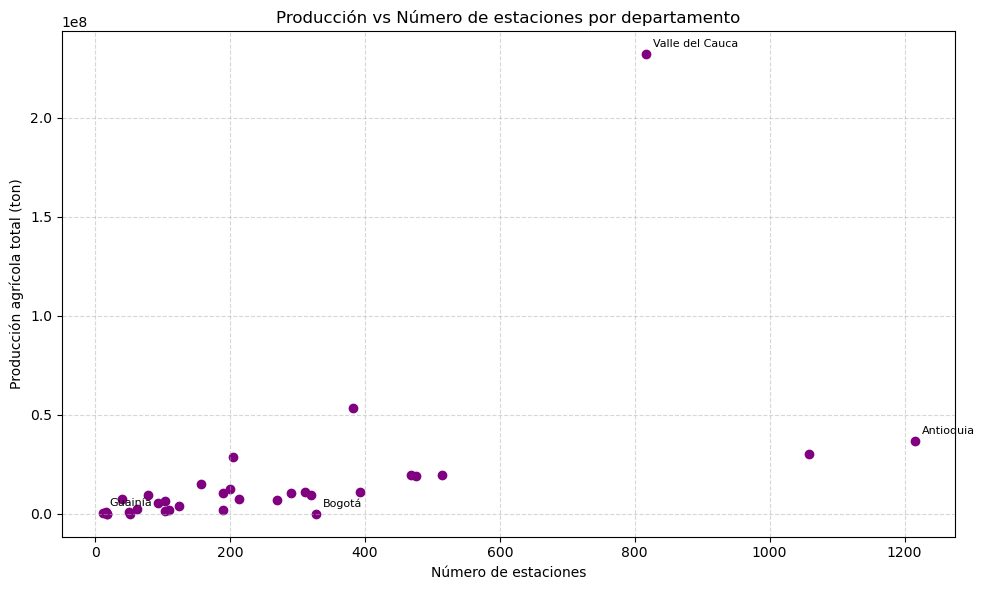

In [103]:
output_path = os.path.join(output_folder, "Producción VS Estaciones.png")

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    dpto_full['Conteo'],
    dpto_full['Producción\n(t)'],
    color='purple'
)
ax.set_xlabel('Número de estaciones')
ax.set_ylabel('Producción agrícola total (ton)')
ax.set_title('Producción vs Número de estaciones por departamento')

high_prod = dpto_full['Producción\n(t)'].idxmax()
low_prod = dpto_full['Producción\n(t)'].idxmin()
high_sta = dpto_full['Conteo'].idxmax()
low_sta = dpto_full['Conteo'].idxmin()

for idx in [high_prod, low_prod, high_sta, low_sta]:
    row = dpto_full.iloc[idx]
    ax.annotate(row['Departamento'], (row['Conteo'], row['Producción\n(t)']),
                textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

## Task 6

Bogotá es el departamento que cuenta con la menor productividad debido a que, la Evaluación Agropecuaria no registra datos para este departamento, lo que se considera una inconsistencia debido a que, en la zona rural de Bogotá se producen alimentos, por tanto, hay una subestimación de los datos.

El departamento de Cauca sería beneficiado al incluir mayor cantidad de estaciones debido a que, es el segundo departamento con mayor producción, por lo que, incluir más estaciones generaría más datos para la toma de decisiones de manejo en la producción. Caso similar se registra en Meta que es el quinto departamento con mayor producción de alimento.